# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from math import sqrt

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
import sklearn
sklearn.__version__

'0.21.3'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0


# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
mini_train_data, mini_train_labels = X[:1000], Y[:1000]
train_data, train_labels = X[:60000], Y[:60000]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
test_data, test_labels = X[61000:], Y[61000:]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

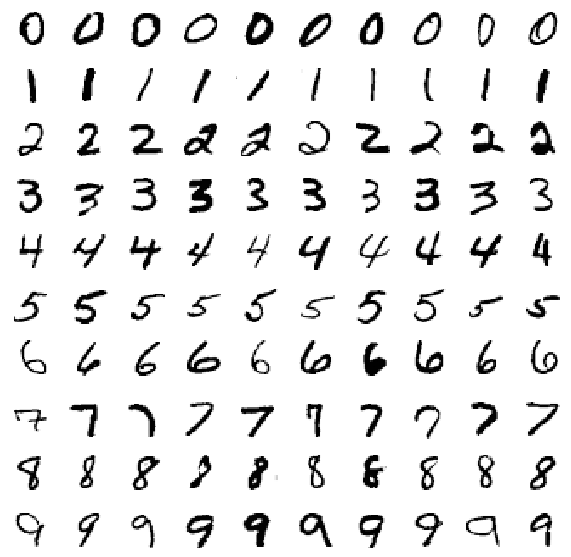

In [4]:
digits = list(range(10))

def P1(num_examples=10):
    
    # Plot size and index
    plt.figure(figsize=(10,10))
    plot_index=1
    
    for label in digits:
        # Create a list of each digit.  This process is iterative for values in 'digits'.
        examples = [data for data, l in zip(mini_train_data, mini_train_labels) if l == str(label)]
        # Take 'num_examples' number of examples from each list.
        plot_examples = examples[0:num_examples]
        # Define a subplot for each example.
        for example in plot_examples:
            plt.subplot(len(digits), num_examples, plot_index)
            plt.gcf().set_facecolor("white") # Set backgroud
            plt.axis('off') # Turn axis off
            plt.imshow(example.reshape(28,28), cmap='Greys') # Set colormap
            plot_index += 1

P1(10)

### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [5]:
def P2(k_values):
    # Iterate through k-values.
    # Use k-values to fit a model from 'mini_train_data, mini_train_labels'.
    # Compute score using 'dev_data, dev_labels' 
    for n_neighbors in k_values:
        kNN_model = KNeighborsClassifier(n_neighbors)
        kNN_model.fit(mini_train_data, mini_train_labels)
        kNN_score = kNN_model.score(dev_data, dev_labels)
        
        # Use predict function to produce classification report.
        if n_neighbors == 1:
            dev_predictions = kNN_model.predict(dev_data)
            print("The Classification Report for k = {} is:" .format(n_neighbors))
            print(classification_report(dev_labels, dev_predictions))
            
        print("The accuracy of the model for k = {} is {:.1f}%." .format(n_neighbors, kNN_score*100))

k_values = [1, 3, 5, 7, 9]
P2(k_values)

The Classification Report for k = 1 is:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

The accuracy of the model for k = 1 is 88.4%.
The accuracy of the model for k = 3 is 87.6%.
The accuracy of the model for k = 5 is 88.2%.
The accuracy of the model for k = 7 is 87.7%.
The accuracy of t

ANSWER:  
Digit 8 is the most difficult for the 1-NN model to recognize.  I used the f1-score to determine the most difficult digit because it is the harmonic mean of precision and recall.  In other words, use the f1-score when understanding the false negatives and false positives are crucial.

As a side note, precision measures the correctly identified positive cases divided by all predicted positive cases.  It is useful when the amount of false positives are high.  Recall is the measure of correctly identified positive cases divided by all actual positive cases.  It is useful when the amount of false negatives are high.

The 1-NN model has the best accuracy.

The test prediction is: 4 
The actual value is: 9 

Let's take a look at the actual value.


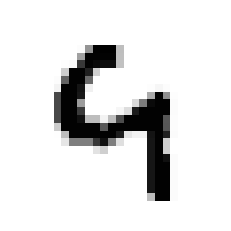

In [6]:
'''
Let's take a look at a mislabeled prediction.
In this case, the model predicted a four while the actual digit is nine.
'''
kNN_model = KNeighborsClassifier(1)
kNN_model.fit(mini_train_data, mini_train_labels)
kNN_score = kNN_model.score(dev_data, dev_labels)
dev_predictions = kNN_model.predict(dev_data)
for i in range(len(mini_train_data)):
    if dev_labels[i] != dev_predictions[i]:
        print("The test prediction is:",dev_predictions[i],
              "\nThe actual value is:", dev_labels[i],
              "\n\nLet's take a look at the actual value.")
        plt.imshow(dev_data[i].reshape(28,28), cmap="Greys")
        plt.axis('off')
        plt.show()
        break

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on subsets of the train set.  For each subset, take just the first part of the train set without re-ordering.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [7]:
def P3(train_sizes, accuracies):
    
    timer = []
    for subset in train_sizes:
        # Fit model using different size training data subsets
        kNN_model = KNeighborsClassifier(n_neighbors=1)
        kNN_model.fit(train_data[:subset], train_labels[:subset])
        
        # Evaluate the models performance and measure the time
        start_time = time.time()
        kNN_score = kNN_model.score(dev_data, dev_labels) 
        end_time = time.time()
        
        # Append accuracy and timer values
        accuracies.append(kNN_score)
        timer.append(end_time - start_time)
    
    # Print table header
    print('Training Size | Accuracy | Compute Time')
    print('----------------------------------------')
    
    # Iterate through size, accuracy, and timer.  Print results.
    for i in range(len(train_sizes)):
        print('{:13d} | {:8.1f}% | {:12.2f}'.format(train_sizes[i], accuracies[i]*100, timer[i]))


train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

Training Size | Accuracy | Compute Time
----------------------------------------
          100 |     70.2% |         0.11
          200 |     79.1% |         0.19
          400 |     81.1% |         0.37
          800 |     86.6% |         0.72
         1600 |     90.5% |         1.49
         3200 |     92.7% |         3.21
         6400 |     93.9% |         7.34
        12800 |     95.2% |        15.10
        25600 |     96.3% |        30.48


### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.


The R-squared value for the linear regression model is: 0.42
The linear regression accuracy prediction for training size 60000 is 1.24
The linear regression accuracy prediction for training size 120000 is 1.64
The linear regression accuracy prediction for training size 1000000 is 7.52


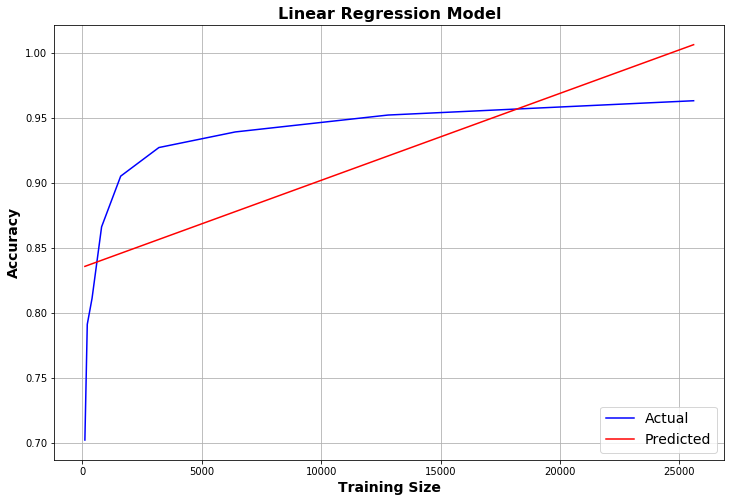


The R-squared value for the logistic regression model is: 0.62
The logistic regression accuracy prediction for training size 60000 is 0.99802
The logistic regression accuracy prediction for training size 120000 is 0.99998
The logistic regression accuracy prediction for training size 1000000 is 1.00000


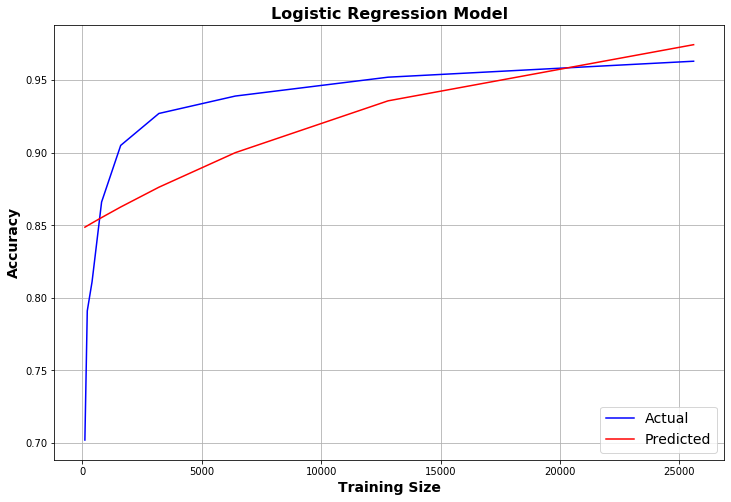


The R-squared value for the logistic regression model is: 0.99
The logistic regression accuracy prediction for training size 60000 is 0.97575
The logistic regression accuracy prediction for training size 120000 is 0.98187
The logistic regression accuracy prediction for training size 1000000 is 0.99261


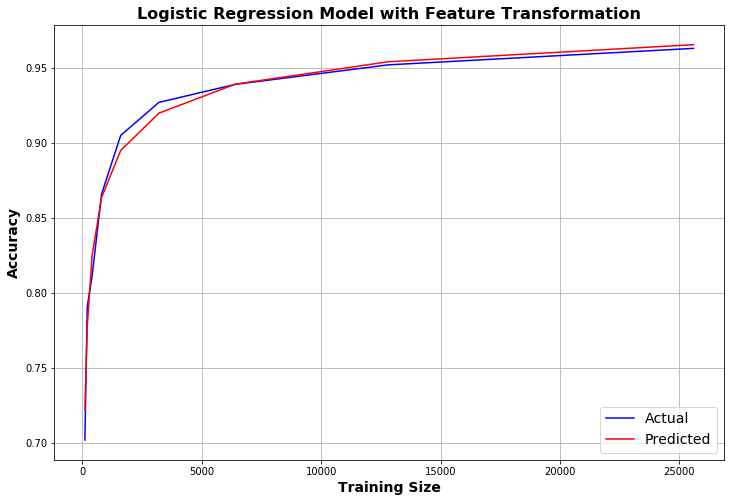

In [8]:
def P4():

    # Define data structure for features and response
    mTrainSizes = np.array(train_sizes).reshape(-1, 1) # Reshape to matrix for input
    mPredictSizes = np.array([60000, 120000, 1000000]).reshape(-1, 1) # Reshape to matrix for input
    vAccuracies = np.array(accuracies) # Reshape to vector for input

    #-------------------#
    # Linear Regression #
    #-------------------#

    # Fit the linear regression model
    LR_model = LinearRegression()
    LR_model.fit(mTrainSizes, vAccuracies)

    # Calculate and show the coefficient of determination - R^2
    R2 = LR_model.score(mTrainSizes, vAccuracies)
    print("\nThe R-squared value for the linear regression model is: {:0.2f}".format(R2))

    # Predict accuracies for 'train_sizes'
    vLinRegPredict1 = LR_model.predict(mTrainSizes)

    # Predict accuracies for 60000, 120000, 1000000
    vLinRegPredict2 = LR_model.predict(mPredictSizes)

    # Show accuracies for 60000, 120000, 1000000
    for i in range(len(mPredictSizes)):
        print("The linear regression accuracy prediction for training size {:0d} is {:1.2f}".format(mPredictSizes[i][0],
                                                                                                vLinRegPredict2[i]))

    # Plot actual and predicted values vs 'train_sizes'
    fig = plt.figure(figsize=(12,8))
    plt.plot(mTrainSizes, vAccuracies, 'b-')
    plt.plot(mTrainSizes, vLinRegPredict1, 'r-')
    plt.title("Linear Regression Model", fontsize=16, fontweight='bold')
    plt.xlabel("Training Size", fontsize=14, fontweight='bold')
    plt.ylabel("Accuracy", fontsize=14, fontweight='bold')
    plt.legend(['Actual', 'Predicted'], loc='lower right', fontsize=14)
    plt.grid(True)
    plt.show()

    #---------------------#
    # Logistic Regression #
    #---------------------#

    # Fit the logistic regression model
    logit_model = LinearRegression()
    logit_model.fit(mTrainSizes, np.log(vAccuracies/(1-vAccuracies)))

    # Calculate and show the coefficient of determination - R^2
    R2 = logit_model.score(mTrainSizes, np.log(vAccuracies/(1-vAccuracies)))
    print("\nThe R-squared value for the logistic regression model is: {:0.2f}".format(R2))

    # Predict accuracies for 'train_sizes'
    vLogRegPredict1 = np.exp(logit_model.predict(mTrainSizes))/(1 + np.exp(logit_model.predict(mTrainSizes)))

    # Predict accuracies for 60000, 120000, 1000000
    vLogRegPredict2 = np.exp(logit_model.predict(mPredictSizes))/(1 + np.exp(logit_model.predict(mPredictSizes)))

    # Show accuracies for 60000, 120000, 1000000
    for i in range(len(mPredictSizes)):
        print("The logistic regression accuracy prediction for training size {:0d} is {:1.5f}".format(mPredictSizes[i][0],
                                                                                                vLogRegPredict2[i]))

    # Plot actual and predicted values vs 'train_sizes'
    fig = plt.figure(figsize=(12,8))
    plt.plot(mTrainSizes, vAccuracies, 'b-')
    plt.plot(mTrainSizes, vLogRegPredict1, 'r-')
    plt.title("Logistic Regression Model", fontsize=16, fontweight='bold')
    plt.xlabel("Training Size", fontsize=14, fontweight='bold')
    plt.ylabel("Accuracy", fontsize=14, fontweight='bold')
    plt.legend(['Actual', 'Predicted'], loc='lower right', fontsize=14)
    plt.grid(True)
    plt.show()

    
    #--------------------------------------------#
    # Logistic Regression With Feature Transform #
    #--------------------------------------------#

    # Transform variables
    tTrainSizes = np.log(mTrainSizes)
    tPredictSizes = np.log(mPredictSizes)
    tAccuracies = np.log(vAccuracies/(1-vAccuracies))
    
    # Fit the logistic regression model
    logit_model = LinearRegression()
    logit_model.fit(tTrainSizes, tAccuracies)

    # Calculate and show the coefficient of determination - R^2
    R2 = logit_model.score(tTrainSizes, tAccuracies)
    print("\nThe R-squared value for the logistic regression model is: {:0.2f}".format(R2))

    # Predict accuracies for 'train_sizes'
    vLogRegPredict1 =  np.exp(logit_model.predict(tTrainSizes))/(1 + np.exp(logit_model.predict(tTrainSizes)))

    # Predict accuracies for 60000, 120000, 1000000
    vLogRegPredict2 = 1/(1 + np.exp(-logit_model.predict(tPredictSizes)))

    # Show accuracies for 60000, 120000, 1000000
    for i in range(len(mPredictSizes)):
        print("The logistic regression accuracy prediction for training size {:0d} is {:1.5f}".format(mPredictSizes[i][0],
                                                                                                vLogRegPredict2[i]))

    # Plot actual and predicted values vs 'train_sizes'
    fig = plt.figure(figsize=(12,8))
    plt.plot(mTrainSizes, vAccuracies, 'b-')
    plt.plot(mTrainSizes, vLogRegPredict1, 'r-')
    plt.title("Logistic Regression Model with Feature Transformation", fontsize=16, fontweight='bold')
    plt.xlabel("Training Size", fontsize=14, fontweight='bold')
    plt.ylabel("Accuracy", fontsize=14, fontweight='bold')
    plt.legend(['Actual', 'Predicted'], loc='lower right', fontsize=14)
    plt.grid(True)
    plt.show()


P4()

ANSWER:  
The accuracy predictions calculated from the k = 1 kNN model is logarithmic in nature.  Therefore, it is not appropriate to use a linear regression model to predict accuracies. Since accuracies are bounded by 0 and 1, a logistic regression model is preferred over a linear regression model.  

The linear regression model predicts accuracies above one, as shown in Figure 1.  The logistic regression model gives a much better prediction (Figure 2).  Even better yet is the regression model with transformed input data (Figure 3).

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

The accuracy of the model is 0.884

The confusion matrix shows that digit 4 being classified as digit 9 is the most common misclassification.

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


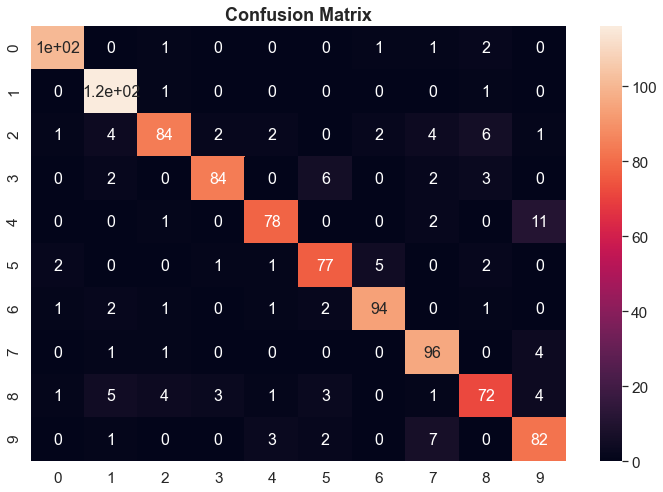

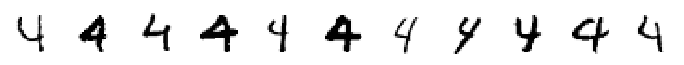

In [9]:
def P5():
    '''
    1. Fit a model using 'mini_train_data' and 'mini_train_labels'.
    2. Predict the response of the model using 'dev_data'
    3. Show the confusion matrix.
    4. Compare the predictions from the 'dev_data' to the actual labels, 'dev_labels' showing examples of the most
    common misclassification.
    '''
    # Fit a 1-NN model
    n_neighbors = 1
    kNN_Model = KNeighborsClassifier(n_neighbors)
    kNN_Model.fit(mini_train_data, mini_train_labels)

    # Predict class using 'dev_data'
    dev_predict = kNN_model.predict(dev_data)

    # Show score 
    kNN_score_dev = kNN_model.score(dev_data, dev_labels)
    print("The accuracy of the model is {:1.3}\n".format(kNN_score_dev))

    # Show confusion matrix
    cm = confusion_matrix(dev_labels, dev_predict)
    print("The confusion matrix shows that digit 4 being classified as digit 9 is the most common misclassification.\n")
    print(cm)

    # Show confusion matrix using seaborn
    sn.set(font_scale=1.4) # for label size
    plt.figure(figsize=(12, 8))
    sn.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size
    plt.title("Confusion Matrix", fontsize=18, fontweight='bold')
    plt.show()

    # Show images of most confused digits
    confuse_4_9 = dev_data[(dev_labels == str(4)) & (dev_predict == str(9))]

    plot_index = 1
    plt.figure(figsize = (12,12))
    for i in range(len(confuse_4_9)):
        plt.subplot(1, len(confuse_4_9), plot_index)
        plt.gcf().set_facecolor("white") # Set backgroud
        plt.axis('off') # Turn axis off
        plt.imshow(confuse_4_9[i].reshape(28,28), cmap='Greys') # Set colormap
        plot_index += 1
    plt.show()

P5()

ANSWER:  
The confusion matrix shows that the model misclassifies digit four as nine most frequently.  Note that the confusion matrix row is the actual digit, while the column is the predicted digit.

The fours incorrectly classified as nine are displayed above. 

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [10]:
def blur_filter(data, pixel_rows, pixel_cols, blur=0):
    # Set blur weight to calculate the weight matrix
    blur_weight = blur / 8
    
    # Reshape data 
    data_matrix = data.reshape(pixel_rows, pixel_cols)
    data_matrix_blurred = np.zeros(data_matrix.shape)
        
    # Iterate through each data and blur pixels
    for row in range(pixel_rows):
        for col in range(pixel_cols):
            # if else statements used to handle corners and first and last row and/or column
            pixel_1 = 0 if (row==0 or col==0) else data_matrix[row-1][col-1]
            pixel_2 = 0 if (row==0) else data_matrix[row-1][col]
            pixel_3 = 0 if (row==0 or col==pixel_cols-1) else data_matrix[row-1][col+1]
            pixel_4 = 0 if (col==0) else data_matrix[row][col-1]
            pixel_5 = data_matrix[row][col]
            pixel_6 = 0 if (col==pixel_cols-1) else data_matrix[row][col+1]
            pixel_7 = 0 if (row==pixel_rows-1 or col==0) else data_matrix[row+1][col-1]
            pixel_8 = 0 if (row==pixel_rows-1) else data_matrix[row+1][col]
            pixel_9 = 0 if (row==pixel_rows-1 or col==pixel_cols-1) else data_matrix[row+1][col+1]
            
            # Define the new pixel value
            data_matrix_blurred[row][col] = (1-blur) * pixel_5 + blur_weight * (
            pixel_1 + pixel_2 + pixel_3 + pixel_4 + pixel_6 + pixel_7 + pixel_8 + pixel_9)
            
    return data_matrix_blurred.flatten()

def blur_data(input_data, pixel_rows, pixel_cols, blur=0):
    # Create empty array
    blurred_data = np.zeros_like(input_data)
    # Iterate through each data and apply filter
    for index, data in enumerate(input_data):
        blurred_data[index] = blur_filter(data, pixel_rows, pixel_cols, blur)
    return blurred_data

def P6(train_data, train_labels, test_data, test_labels, rows, cols, blur):    
    blur = blur
    
    # Blur train and test data
    blurred_train_data = blur_data(train_data, rows, cols, blur)
    blurred_test_data = blur_data(test_data, rows, cols, blur)

    #------------------------#
    # Model 1 - No filtering #
    #------------------------#
    # Fit a 1-NN model
    n_neighbors = 1
    kNN_model01 = KNeighborsClassifier(n_neighbors) # KNN classifier 
    kNN_model01.fit(train_data, train_labels) # Fit model no blur
    kNN_model01_score = kNN_model01.score(test_data, test_labels) # Return score no blur

    #-----------------------------#
    # Model 2 - Filter train data #
    #-----------------------------#
    # Fit a 1-NN model
    n_neighbors = 1
    kNN_model02 = KNeighborsClassifier(n_neighbors) # KNN classifier 
    kNN_model02.fit(blurred_train_data, train_labels) # Fit model with blur
    kNN_model02_score = kNN_model02.score(test_data, test_labels) # Return score no blur


    #----------------------------#
    # Model 3 - Filter test data #
    #----------------------------#
    # Fit a 1-NN model
    n_neighbors = 1
    kNN_model03 = KNeighborsClassifier(n_neighbors) # KNN classifier
    kNN_model03.fit(train_data, train_labels) # Fit model no blur
    kNN_model03_score = kNN_model03.score(blurred_test_data, test_labels) # Return score with blur

    #--------------------------------------#
    # Model 4 - Filter train and test data #
    #--------------------------------------#
    # Fit a 1-NN model
    n_neighbors = 1
    kNN_model04 = KNeighborsClassifier(n_neighbors) # KNN classifier
    kNN_model04.fit(blurred_train_data, train_labels) # Fit model with blur
    kNN_model04_score = kNN_model04.score(blurred_test_data, test_labels) # Return score with blur

    return kNN_model01_score, kNN_model02_score, kNN_model03_score, kNN_model04_score 

blur_weight = 0.55
accuracy = P6(mini_train_data, mini_train_labels, dev_data, dev_labels, 28, 28, blur_weight)
for i in range(len(accuracy)):
    print("Using blur weight {:1.2f} the accuracy of Model {:1.0f} is {:2.1f}%".format(blur_weight, i+1, accuracy[i]*100))

Using blur weight 0.55 the accuracy of Model 1 is 88.4%
Using blur weight 0.55 the accuracy of Model 2 is 90.6%
Using blur weight 0.55 the accuracy of Model 3 is 87.3%
Using blur weight 0.55 the accuracy of Model 4 is 89.9%


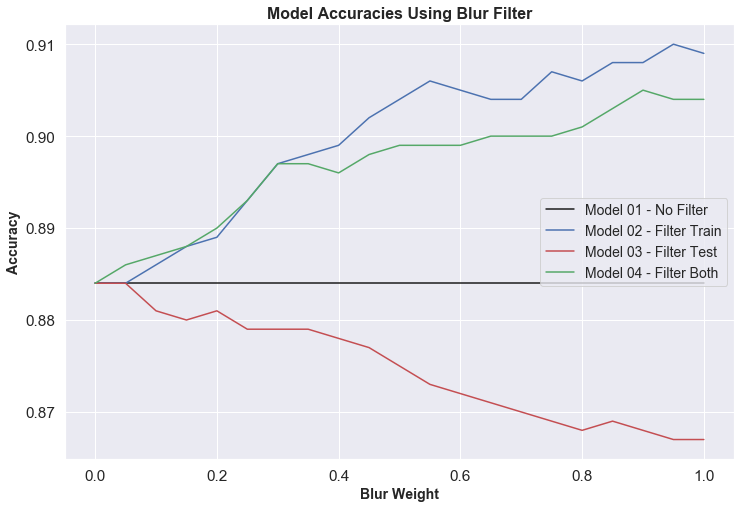

In [11]:
def P6b():   
    # Create list of blur weights
    blur_weights = []
    for blur in np.arange(0, 1.05, 0.05):
        blur_weights.append(blur)

    # Calculate each models accuracies using blur weight 0 to 1 with 0.05 increments    
    accuracies = []    
    for blur in blur_weights:
        # Append accuracies list
        accuracies.append(P6(mini_train_data, mini_train_labels, dev_data, dev_labels, 28, 28, blur))

    # Create empty list
    model01_accuracies = []
    model02_accuracies = []
    model03_accuracies = []
    model04_accuracies = []

    # Seperate model accuracies from weights 0 to 1 into resepective lists
    for i in range(len(accuracies)):
        # Append respective accuracies list
        model01_accuracies.append(accuracies[i][0]),model02_accuracies.append(accuracies[i][1])
        model03_accuracies.append(accuracies[i][2]), model04_accuracies.append(accuracies[i][3])

    # Plot model accuracies vs blur weight
    fig = plt.figure(figsize=(12,8))
    plt.plot(blur_weights, model01_accuracies, 'k-')
    plt.plot(blur_weights, model02_accuracies, 'b-')
    plt.plot(blur_weights, model03_accuracies, 'r-')
    plt.plot(blur_weights, model04_accuracies, 'g-')
    plt.title("Model Accuracies Using Blur Filter", fontsize=16, fontweight='bold')
    plt.xlabel("Blur Weight", fontsize=14, fontweight='bold')
    plt.ylabel("Accuracy", fontsize=14, fontweight='bold')
    plt.legend(['Model 01 - No Filter','Model 02 - Filter Train', 'Model 03 - Filter Test', 'Model 04 - Filter Both'], loc='right', fontsize=14)
    plt.grid(True)
    plt.show()
    
P6b()

ANSWER:  
Notice that as the blur weight increases, the accuracies of Model 2 and Model 4 also increase.  Conversely, Model 3 accuracies decrease as blur weights increase.

In conclusion, training a model on blurred data and testing on unblurred data produced the best accuracies.  Contrarily, training a model on unblurred data and testing on blurred data produced the worst accuracies. Note that the model trained and tested on blurred data performed well but not as good as the model trained on blurred data and test on unblurred data.

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [12]:
# function for multinom - 3 values
def multinom_pixel(data, white_threshold, black_threshold):
    multinom_data = data.copy() # copy data
    multinom_data[data <= white_threshold] = 0 # if the value is less than or equal to white_threshold make it 0
    multinom_data[(data > white_threshold) & (data < black_threshold)] = 1 # if the value is greater than white_threshold 
                                                                           # and less that blakc_threshold make it 1
    multinom_data[data >= black_threshold] = 2 # if the value is greater than black threshold makit it 2
    return multinom_data

def P7():
    # Binomial model
    BNB_model = BernoulliNB(binarize=0.1) # Bernoulli Naive Bayes model with binary threshold set to 0.1
    BNB_model.fit(mini_train_data, mini_train_labels) # Fit model
    BNB_score = BNB_model.score(dev_data, dev_labels) # Return accuracy
    print("The accuracy for the Bernoulli Naive Bayes model is {:2.1f}%\n".format(BNB_score*100))

    # Multinomial model
    MNB_model = MultinomialNB() # Multinomial Naive Bayes model
    MNB_model.fit(multinom_pixel(mini_train_data, 0.1, 0.9), mini_train_labels) # Fit model using multinom data transform
    MNB_score = MNB_model.score(dev_data, dev_labels) # Return accuracy
    print("The accuracy for the Multinomial Naive Bayes model is {:2.1f}%\n".format(MNB_score*100))

P7()

The accuracy for the Bernoulli Naive Bayes model is 81.4%

The accuracy for the Multinomial Naive Bayes model is 80.7%



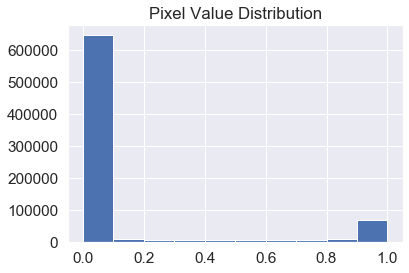

In [13]:
plt.hist(mini_train_data.flatten(), 10)
plt.title("Pixel Value Distribution")
plt.show()

ANSWER:  
No, the Bernoulli Naive Bayes model has better accuracy than the Multinomial Naive Bayes model.  Keep in mind that the pixel value is a bimodal distribution with values heavily concentrated close to zero and one.  The binomial model with threshold 0.1 classifies values close to zero as zero and all other values as one; testing for presence/absence for this application offers more accurate predictions  The "gray area" of the multinomial does not increase prediction accuracy--slight overfitting may exist.  The Bernoulli Naive Bayes generalizes marginally better.  

### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [14]:
def P8(alphas):
    # Use GridSearchCV to run an exhaustive search over specified values for an estimator
    # estimator, param_grid, cv - splitting strategy, scoring - accuracy
    cvnb = GridSearchCV(BernoulliNB(), param_grid = alphas, cv=5, scoring='accuracy', iid=False)
    cvnb.fit(mini_train_data, mini_train_labels) # Fit model
    print("The best value for alpha is: {}\n".format(cvnb.best_params_)) # Parameter setting that gave the best results on the hold out data
    print('Alpha    | Accuracy ')
    print('--------------------')
    # print alphas and accuracies from cv_results_ side by side
    for alpha, score in zip(alphas['alpha'], cvnb.cv_results_['mean_test_score']):
        print('{:8} | {:0.1f}%'.format(str(alpha), score*100))

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}

P8(alphas)


The best value for alpha is: {'alpha': 0.001}

Alpha    | Accuracy 
--------------------
1e-10    | 81.3%
0.0001   | 82.1%
0.001    | 82.5%
0.01     | 82.0%
0.1      | 81.8%
0.5      | 81.6%
1.0      | 81.1%
2.0      | 80.5%
10.0     | 78.1%


ANSWER:  
The best value for alpha is 0.001, which produces an accuracy of 82.5%. The accuracy when alpha is very close to zero is 81.3%.  When alpha is in the neighborhood of zero, the accuracies range from 82.0% - 82.5%.  Interestingly, these accuracies are better than when alpha is equal to one.
  
Remember that Laplace smoothing is a technique used to remove zero probability from a Naive Bayes model.  There is a strong belief that the value of alpha should be one, though, in practice, smaller values are typically used.  Keep in mind that as alpha increases, the likelihood probability moves toward 0.5, which can negatively impact the model's ability to generalize.

That said,  I initially expected that an alpha equal to one would produce the best result.  However, after thinking about the application and considering the prior binomial model's low threshold value, I figured an alpha close to zero (more extreme presence/absence probability) would be the best for generalizing considering the relatively small dataset.  With a larger dataset, values of alpha between zero and one will likely have a marginal effect.

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

The accuracy of the Gaussian Naive Bayes model is 59.3%
The mean of the theta is: 0.13234
The mean of the sigma is: 0.05300


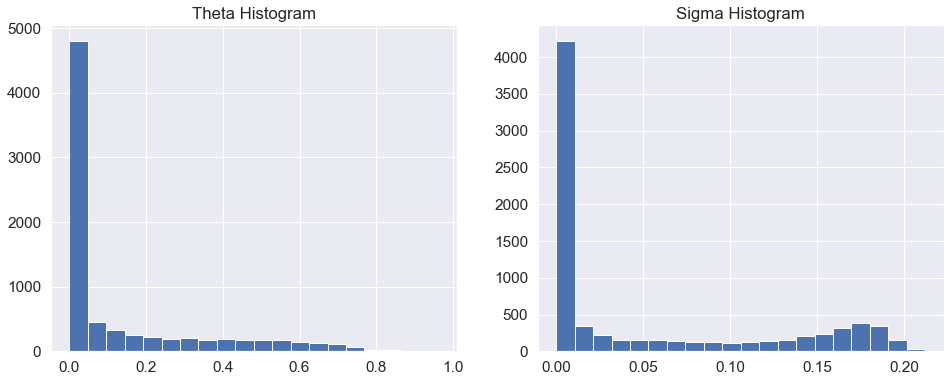

Theta - Mean of feature per class


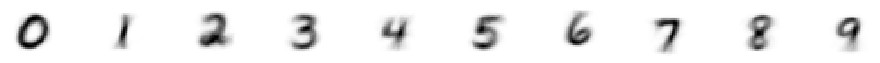

Sigma - Variance of each feature per class


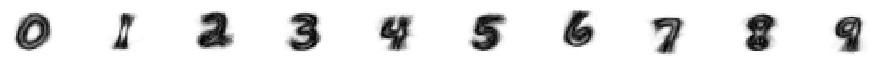


The accuracy of the Gaussain Naive Bayes model with smoothing is 81.7%
The mean of the theta is: 0.13234
The mean of the sigma is: 0.07314


In [20]:
def P9():
    # Gaussian Naive Bayes
    gnb = GaussianNB()
    gnb.fit(mini_train_data, mini_train_labels)
    gnb_score = gnb.score(dev_data, dev_labels)
    print("\033[1m" + "The accuracy of the Gaussian Naive Bayes model is {:2.1f}%".format(gnb_score*100) + "\033[0m")
    print("The mean of the theta is: {:.5f}".format(gnb.theta_.flatten().mean()))
    print("The mean of the sigma is: {:.5f}".format(gnb.sigma_.flatten().mean()))
    
    # Theta histogram
    plt.figure(figsize=(16, 6))
    plt.subplot(1,2,1)
    plt.hist(gnb.theta_.flatten(),20)
    plt.title("Theta Histogram")
    
    # Sigma histogram
    plt.subplot(1,2,2)
    plt.hist(gnb.sigma_.flatten(),20)
    plt.title("Sigma Histogram")
    plt.show()
    
    # Theta digits
    print("Theta - Mean of feature per class")
    plt.figure(figsize=(16,2))
    for i in range(len(gnb.theta_)):
        plt.subplot(2, len(gnb.theta_), i+1)
        plt.axis("off")
        plt.imshow(gnb.theta_[i].reshape(28,28), cmap='Greys')
    plt.show()
    
    # Sigma digits
    print('Sigma - Variance of each feature per class')
    plt.figure(figsize=(16,2))
    for i in range(len(gnb.sigma_)):
        plt.subplot(2, len(gnb.sigma_), i+1+len(gnb.theta_))
        plt.axis("off")
        plt.imshow(gnb.sigma_[i].reshape(28,28), cmap='Greys')
    plt.show()
    
    # Gaussian Naive Bayes with var_smoothing = 0.1
    gnb_smooth = GaussianNB(var_smoothing=0.1)
    gnb_smooth.fit(mini_train_data, mini_train_labels)
    gnb_smooth_score = gnb_smooth.score(dev_data, dev_labels)
    print("\033[1m" + "\nThe accuracy of the Gaussain Naive Bayes model with smoothing is {:2.1f}%".format(gnb_smooth_score*100)+ "\033[0m")
    print("The mean of the theta is: {:.5f}".format(gnb_smooth.theta_.flatten().mean()))
    print("The mean of the sigma is: {:.5f}".format(gnb_smooth.sigma_.flatten().mean()))

P9()

ANSWER:  
After analyzing the original model's theta and sigma distributions, it is apparent that the mean and variance are heavily skewed.  Therefore, I added a var_smoothing parameter to widen the variance in the calculation for improved model stability.  

A Gaussian curve acts as a low pass filter that considers only samples close to the mean.  As I learned in P6, blurring the training data resulted in the best accuracy.  Moreover, the var_smooth parameter produces a similar effect.  Introducing a wider variance is effectively adding noise to the data by accounting for values further from the mean.  Note that the bimodal distribution of the sigma distribution lends itself well for utilizing the var_smooth parameter.

One reason for deviations in digit representation other than the difference in penmanship is if the same person wrote the same number in different areas of the 28 x 28 grid, there could be confusion in classification.  Smoothing the data mitigates this effect to some degree.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

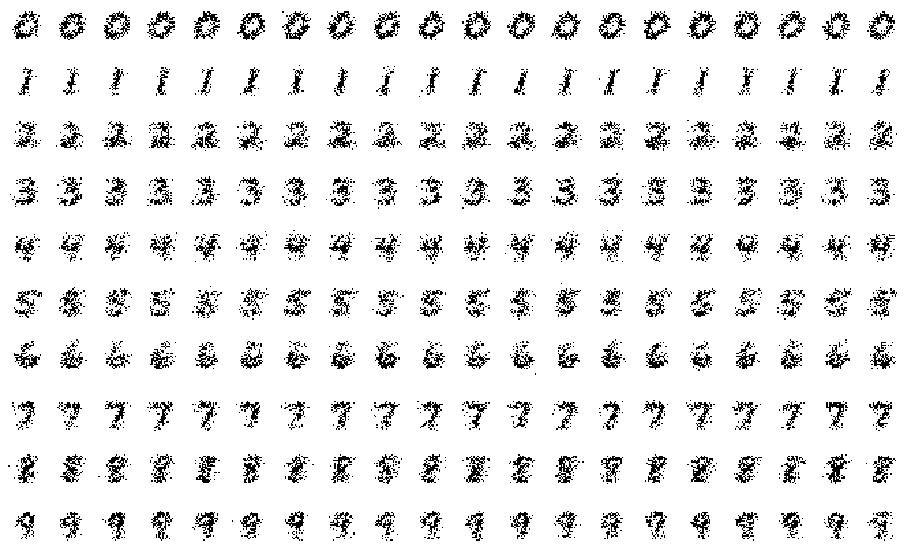

In [21]:
def P10(num_examples, threshold=0.3):
    
    bnb = BernoulliNB(binarize=threshold) # Bernoulli Naive Bayes utilizing binarized sample features
    bnb.fit(train_data, train_labels) # Fit model
    probs = np.exp(bnb.feature_log_prob_) # Return an array of probabilities for each pixel for every label (10, 784)


    # Setup plot size
    fig = plt.figure(figsize=(16,10))
    # Iterate through each digit and produce 'num_examples' number of examples
    for i in range(len(probs)):
        for j in range(num_examples):
            # Setup subplot
            ax = fig.add_subplot(len(probs), num_examples, i*num_examples+j+1) # subplot(nrows, ncols, index)
            # np.random.rand() returns an array of random values from a normal distribution.
            # The size of the array is dictated by the input value len(probs[i]), which is 784 in this case.
            # If the respective element of np.random.rand is less then the respective element of probs[i] (probability of pixel) then the respective pixels element is False
            # If not the respective pixels element is True.  This logic creates a True or False array of size 784 (pixels).  True will be display as black and False as white.
            pixels = np.random.rand(len(probs[i])) < probs[i] 
            ax.imshow(pixels.reshape(28,28), cmap='Greys') # Reshape and plot the pixel array
            ax.axis('off')
            
P10(20, .3) # 0.3 was the value that maximized accuracy in Part 7

ANSWER:  
The generated feature images are the aggregation of random samples that are displayed if the sample is less than the respective pixel probability for each digit (can also use the greater than operator). All things considered, the generated digits are a good representation of the actual digits.  Some numbers are more recognizable than others.  For example, zero and one are easier to identify than four, eight, and nine. 

These images are a good representation of the shortcomings inherent to the Naive Bayes model.  Recall the conditional independence assumption that states features are independent of each other given the class.  We know this is not true.  If I were drawing digit one from top-down, the bottom half of the digit would depend on where I started drawing the top half. 

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [22]:
def P11(buckets, correct, total):

    bnb = BernoulliNB(binarize=0.0, alpha=0.001) # Bernoulli Naive Bayes utilizing binarized sample features and alpha=0.001
    bnb.fit(mini_train_data, mini_train_labels) # Fit model 
    pred = bnb.predict(dev_data) # Predict labels
    prob = bnb.predict_proba(dev_data) # Return probability estimates
    prob_max = np.amax(prob, axis=1) # Extract appropriate digit probability

    low = 0.0
    i = 0
    
    # iterate through buckets, assign high and low values for a range of probabilities
    # alpha=0.001 ensures no zero probabilities
    # the logical_and creates an array of True/False that is summed to count the total
    # if the prediction is equal to the actual then correct is incremented by one
    for high in buckets:
        bucket = np.logical_and(prob_max > low, prob_max <= high)
        total[i] = bucket.sum()
        correct[i] = np.sum(dev_labels[bucket] ==  pred[bucket])
        low = high
        i += 1


buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   0    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  31    accuracy = 0.355
p(pred) is 0.9000000000000 to 0.9990000000000    total =  67    accuracy = 0.433
p(pred) is 0.9990000000000 to 0.9999900000000    total =  59    accuracy = 0.458
p(pred) is 0.9999900000000 to 0.9999999000000    total =  46    accuracy = 0.652
p(pred) is 0.9999999000000 to 0.9999999990000    total =  62    accuracy = 0.774
p(pred) is 0.9999999990000 to 0.9999999999900    total =  33    accuracy = 0.788
p(pred) is 0.9999999999900 to 0.9999999999999    total =  43    accuracy = 0.791
p(pred) is 0.9999999999999 to 1.0000000000000    total = 659    accuracy = 0.938


ANSWER:  
This is a weakly calibrated classifier.  The first indication is the positive correlation between the posterior probabilities and the accuracies--this attribute negates a poorly calibrated classifier.  The model being a strongly calibrated classifier is ruled out due to prediction accuracies far below 90% when the posterior probabilities are 0.9+.

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [25]:
def stack_row_col_sums(input_data, pixel_rows, pixel_cols):
    # Create empty matrix
    # Shape accoding to data length and pixel rows by cols
    sum_data = np.zeros((len(input_data), pixel_rows + pixel_cols)) 
    # Iterate through input_data
    for index, data in enumerate(input_data):
        # Reshape input_data to pixel format
        matrix = input_data[index].reshape(28, 28)
        # Sum the row and column values
        row_sum = np.sum(matrix, axis=0)
        col_sum = np.sum(matrix, axis=1)
        # Normalize the row and col values
        row_data = row_sum/row_sum.max()
        col_data = col_sum/col_sum.max()
        # Append row and column data
        sum_data[index] = np.append(row_data, col_data)
    # Return horizontally stacked data    
    return np.hstack((input_data, sum_data))

def P12():
    # Add features to train and test data
    mini_train_data_enhanced = stack_row_col_sums(mini_train_data, 28, 28)
    dev_data_enhanced = stack_row_col_sums(dev_data, 28, 28)

    bnb = BernoulliNB() # Bernoulli Naive Bayes utilizing binarized sample features and alpha=0.001
    bnb.fit(mini_train_data, mini_train_labels) # Fit model 
    bnb_score = bnb.score(dev_data, dev_labels) # Predict labels

    bnb_enhanced = BernoulliNB() # Bernoulli Naive Bayes 
    bnb_enhanced.fit(mini_train_data_enhanced, mini_train_labels) # Fit model using enhanced data
    bnb_enhanced_score = bnb_enhanced.score(dev_data_enhanced, dev_labels) # Score using enhanced data

    print("The Bernoulli Naive Bayes model's accuracy using the original data is {:2.1f}%\n".format(bnb_score*100))
    print("The Bernoulli Naive Bayes model's accuracy using the enhanced data is {:2.1f}%".format(bnb_enhanced_score*100))

P12()

The Bernoulli Naive Bayes model's accuracy using the original data is 80.9%

The Bernoulli Naive Bayes model's accuracy using the enhanced data is 81.6%


The enhanced data including normalized row and column sums improved the original model's accuracy by 0.7%.